# **EL KEDDADI KAOUTAR **

Webscraping de 2000 pages ce qui donne 70000 offres

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import pandas



In [ ]:
prices=[]
info=[]
items=[]
categories=[]
villes=[]
times=[]
for i in range(2,2002):
  page = requests.get('https://www.avito.ma/fr/maroc/?o='+str(i))
  soup = BeautifulSoup(page.content, 'html.parser')
  all=soup.find("div",{"class":"listing listing-thumbs"}) 
  price=all.find_all("div",{"class":"item-price"})              ########## les prix des offres
  for a in price :
    sr=a.text.replace("\n","").strip()
    sr=sr.replace(" ","")
    if sr=="" : prices.append(sr)
    else:prices.append(int(sr[:len(sr)-2]))
  for link in all.find_all('a'):                                ########## les informations : l'offre , catégorie et la ville
    thelink=link.get('href')
    inf=link.string
    if inf!=None:info.append(inf)
  for i in range(0,70,2):
    items.append(info[i])
    s1=''
    s2=''
    for j in range(len(info[i+1])):
      k=info[i+1].index(',')
      if j<k:s1=s1+info[i+1][j]
      if j>k:s2=s2+info[i+1][j]
    categories.append(s1)
    villes.append(s2)
  time=all.find_all("abbr",{"class":"text-center"})            #######les dates des offres 
  for t in time:
    l=t.text.replace("\n","").strip()
    times.append(l[:len(l)-5])                                 
    
print(len(items))
print(len(villes))
print(len(categories))
print(len(prices))
print(len(times))
print(times)



70000
70000
70000
70000
70000
["Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'hui", "Aujourd'

In [ ]:
data={'item':items,'ville':villes,'categorie':categories,'prix':prices,'jour':times}
df=pandas.DataFrame(data)
df.to_csv('webscraping.csv')
df

,item,ville,categorie,prix,jour
0,شقة بموقع جيد في سيدي مومن,Casablanca,Appartements,250000,Aujourd'hui
1,rail hiwin سكك الحديدية مرحبا اقتراحاتكم سهام...,Casablanca,Matériels Professionnels,,Aujourd'hui
2,Mercedes-Benz Classe S Diesel -2015,Casablanca,Voitures,,Aujourd'hui
3,Paravent 3 volets FLOWERS I,Guelmim,Meubles et Décoration,750,Aujourd'hui
4,moteur citrôen saxo.1.5,Marrakech,Pièces et Accessoires pour véhicules,2500,Aujourd'hui
...,...,...,...,...,...
69995,IPhone 6s Plus 64Go,Casablanca,Téléphones,660000,17 Mar
69996,Pour Sony Obj Gde ouverture Sigma 85 mm F 1.4,Casablanca,Appareils photo et Caméras,1700,17 Mar
69997,Sandero diesel -2017,Casablanca,Voitures,,17 Mar
69998,Camera Cinema Canon C100 Mark II Boitier,Casablanca,Appareils photo et Caméras,586,17 Mar


In [ ]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
%matplotlib inline
import numpy as np

Nombres des élèment par catégorie


categorie
AUTRES                                  2000
Animaux                                 2000
Electroménager et Vaisselles            2000
Image & Son                             2000
Pièces et Accessoires pour véhicules    2000
Name: categorie, dtype: int64

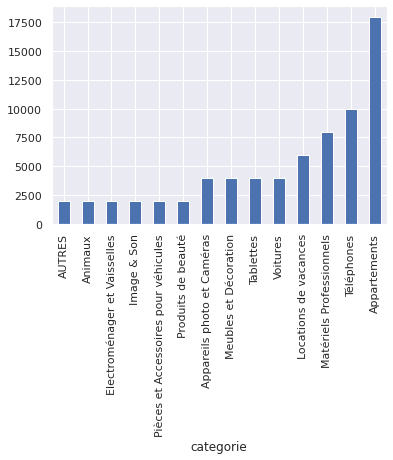

In [ ]:
nbrcateg=df.groupby("categorie")["categorie"].count().sort_values(ascending=True)
nbrcateg.plot.bar();
nbrcateg.head(5)


Nombres d'offre par ville

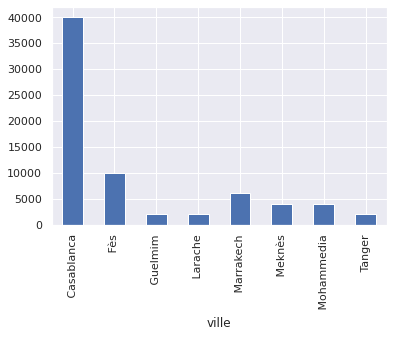

In [ ]:

nbroffre=df.groupby(by='ville').count()
nbroffre['item'].plot.bar();


Nombre d'offre par jour


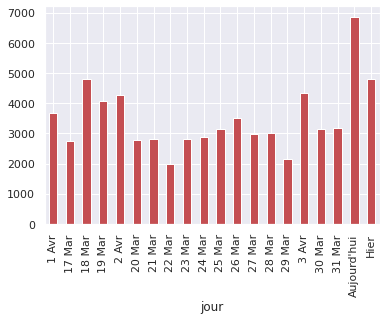

In [ ]:
nbroffrej=df.groupby(by='jour').count()
nbroffrej['item'].plot.bar(color='r');


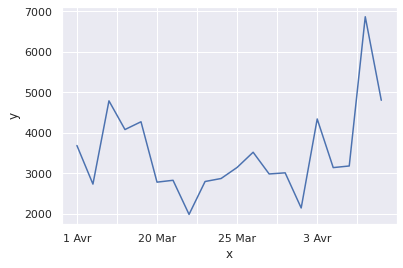

In [ ]:
ax = nbroffrej["ville"].plot();
ax.set_xlabel("x")
ax.set_ylabel("y");

Nombres d'offres au 17 mars


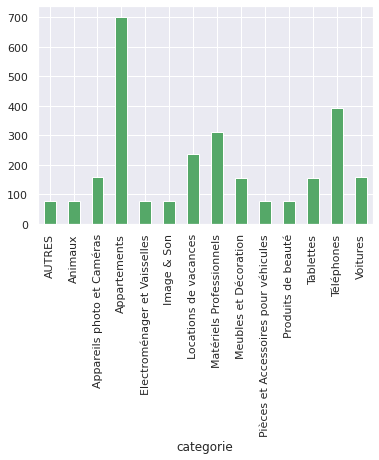

In [ ]:

xx=df[df['jour']=='17 Mar']
xxx=xx.groupby(by='categorie').count()
xxx['item'].plot.bar(color='g');



([<matplotlib.patches.Wedge at 0x7f32132217b8>,
 [Text(1.4939614409254176, 0.13445896410447933, 'AUTRES'),
  Text(1.445944290443315, 0.39905527052574774, 'Animaux'),
  Text(1.3514533002214495, 0.6508256120655923, 'Electroménager et Vaisselles'),
  Text(1.2135254884668472, 0.8816778826994018, 'Image & Son'),
  Text(1.0365939685860934, 1.0841923004204248, 'Pièces et Accessoires pour véhicules'),
  Text(0.8263454652712785, 1.2518598851411424, 'Produits de beauté'),
  Text(0.4635254815449332, 1.4265847776976095, 'Appareils photo et Caméras'),
  Text(-0.06729725905457745, 1.4984895992043925, 'Meubles et Décoration'),
  Text(-0.5895375627007924, 1.3792916523218754, 'Tablettes'),
  Text(-1.0365939876191073, 1.0841922822230003, 'Voitures'),
  Text(-1.404352317238949, 0.527062206068311, 'Locations de vacances'),
  Text(-1.4459442787676111, -0.3990553128317084, 'Matériels Professionnels'),
  Text(-0.7108029239237432, -1.3208933353384207, 'Téléphones'),
  Text(1.0365941018171851, -1.0841921730384

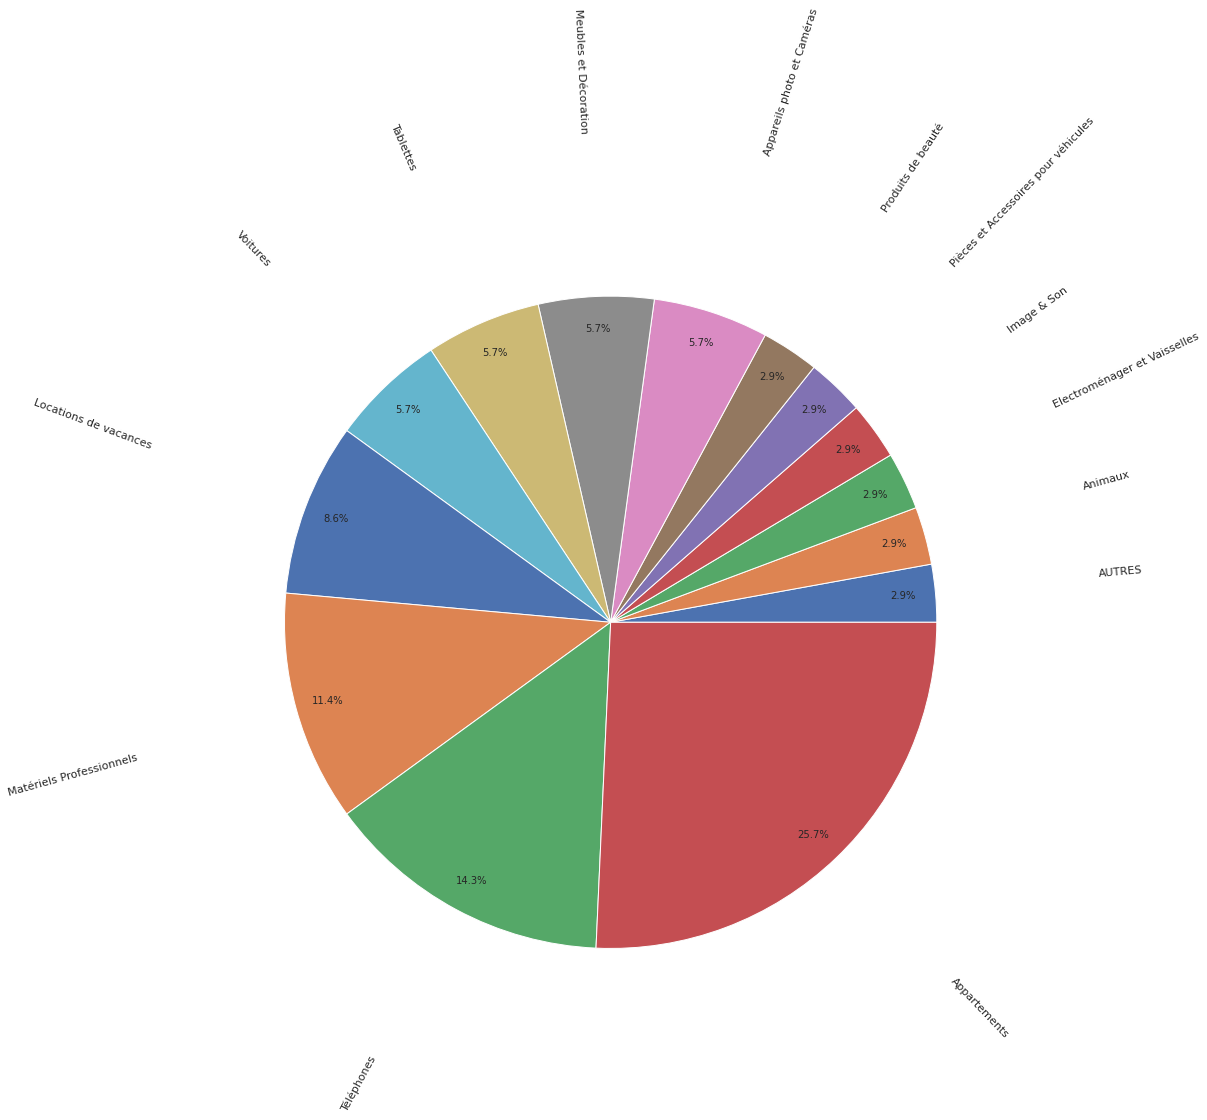

In [ ]:
plt.figure(figsize=(20,15))
## les indices 
labels=nbrcateg.index
sizes=nbrcateg
plt.pie(sizes , labels=labels , autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.5 ,rotatelabels=True)